![Logo](https://www.up.edu.mx/wp-content/themes/panamericana/img/logo-footer.png)

# **Series de tiempo**

## **Asignatura:** Econometría  
## **Profesora:** Mae. Julieta María Sarralde Vera

---

**Nombre del Alumno:**  
Luis Enrique Noguera Gil

**Fecha de entrega:**  
30 de septiembre de 2024


# Auto reload modules

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scripts.index as index
import fs

In [3]:
MAIN_DIR = fs.open_fs("../../data/raw/Class03")
DATA_DIR = MAIN_DIR.getsyspath("Datos_aguacate.xlsx")

In [4]:
# Librerías

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [6]:
df = pd.read_excel(DATA_DIR , header=0)
df

,Año,Bimestre,t,Toneladas
0,2019,1,1,224604.039806
1,2019,2,2,201125.901920
2,2019,3,3,154184.056425
3,2019,4,4,140857.767025
4,2019,5,5,213070.497632
5,2019,6,6,268644.203714
6,2020,1,7,316793.517675
7,2020,2,8,283659.092451
8,2020,3,9,217428.694959
9,2020,4,10,198535.979137


<Axes: xlabel='t', ylabel='Toneladas'>

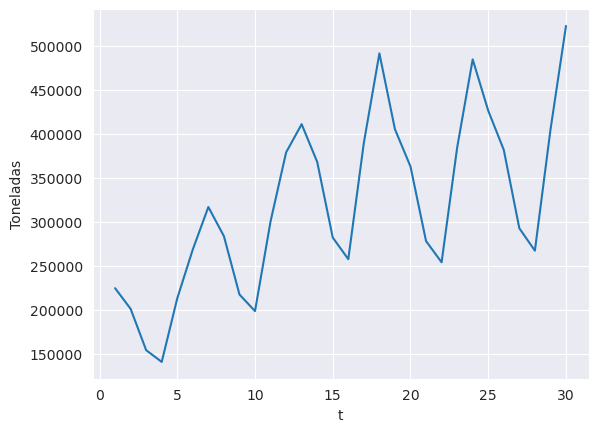

In [7]:
sns.lineplot(data=df, x='t', y='Toneladas')

In [8]:
from statsmodels.tsa.arima.model import ARIMA

In [11]:
# Calcular la autocorrelación en lag 1
fac_lag1 = df['Toneladas'].autocorr(lag=1)

print(f'Factor de Autocorrelación (FAC) en lag 1: {fac_lag1}')


Factor de Autocorrelación (FAC) en lag 1: 0.6946904905355855


In [15]:
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + (df['Bimestre']*2 - 1).astype(str) + '-01')

In [16]:
df

,Año,Bimestre,t,Toneladas,Fecha
0,2019,1,1,224604.039806,2019-01-01
1,2019,2,2,201125.901920,2019-03-01
2,2019,3,3,154184.056425,2019-05-01
3,2019,4,4,140857.767025,2019-07-01
4,2019,5,5,213070.497632,2019-09-01
5,2019,6,6,268644.203714,2019-11-01
6,2020,1,7,316793.517675,2020-01-01
7,2020,2,8,283659.092451,2020-03-01
8,2020,3,9,217428.694959,2020-05-01
9,2020,4,10,198535.979137,2020-07-01


In [20]:
series = df[["Fecha", "Toneladas"]].set_index("Fecha")
series.head()

,Toneladas
Fecha,
2019-01-01,224604.039806
2019-03-01,201125.901920
2019-05-01,154184.056425
2019-07-01,140857.767025
2019-09-01,213070.497632


In [22]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Toneladas   No. Observations:                   30
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -357.526
Date:                Mon, 30 Sep 2024   AIC                            727.052
Time:                        21:01:34   BIC                            735.256
Sample:                    01-01-2019   HQIC                           729.621
                         - 11-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1702      0.203      0.840      0.401      -0.227       0.567
ar.L2         -0.5604      0.105     -5.362      0.000      -0.765      -0.356
ar.L3         -0.0952      0.239     -0.399      0.6

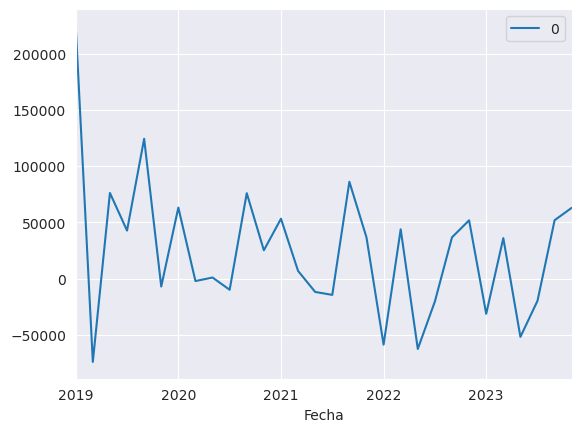

In [24]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

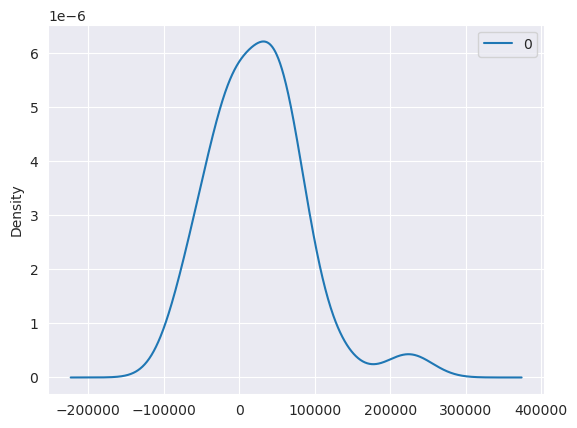

                   0
count      30.000000
mean    24462.597795
std     61381.875738
min    -74107.667812
25%    -13860.639052
50%     30542.714940
75%     52870.898999
max    224604.039806


In [23]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [25]:
# summary stats of residuals
print(residuals.describe())

                   0
count      30.000000
mean    24462.597795
std     61381.875738
min    -74107.667812
25%    -13860.639052
50%     30542.714940
75%     52870.898999
max    224604.039806


<Figure size 1000x600 with 0 Axes>

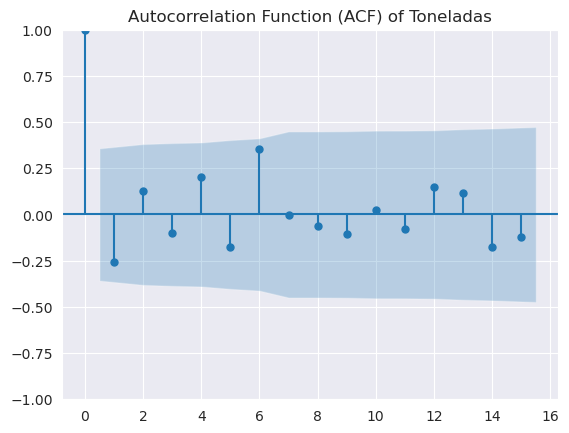

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Create an autocorrelation plot (ACF) similar to the example provided (bar plot style)
plt.figure(figsize=(10, 6))
plot_acf(residuals)
plt.title('Autocorrelation Function (ACF) of Toneladas')
plt.show()

In [27]:
residuals

,0
Fecha,
2019-01-01,224604.039806
2019-03-01,-74107.667812
2019-05-01,76103.250894
2019-07-01,42661.329622
2019-09-01,124254.248752
2019-11-01,-7081.271699
2020-01-01,63118.544741
2020-03-01,-2210.479631
2020-05-01,911.454453
